=== Estadísticas numéricas ===
             Edad  Velocidad de Respuesta
count  100.000000              100.000000
mean    38.910000                2.820000
std     13.370475                1.513441
min     18.000000                1.000000
25%     28.000000                1.000000
50%     36.500000                3.000000
75%     51.250000                4.000000
max     60.000000                5.000000

=== Distribución por categoría ===

Ocupación:
Ocupación
Empresario     30
Estudiante     25
Profesional    24
Otro           21
Name: count, dtype: int64

Nivel de Experiencia:
Nivel de Experiencia
Ninguna       29
Básica        28
Avanzada      26
Intermedia    17
Name: count, dtype: int64

Frecuencia de Uso:
Frecuencia de Uso
Diariamente       28
Frecuentemente    27
Ocasionalmente    27
Nunca             18
Name: count, dtype: int64

Tipo de BD:
Tipo de BD
MySQL         24
SQL Server    21
Oracle        19
Otro          19
PostgreSQL    17
Name: count, dtype: int64

Errores de Se

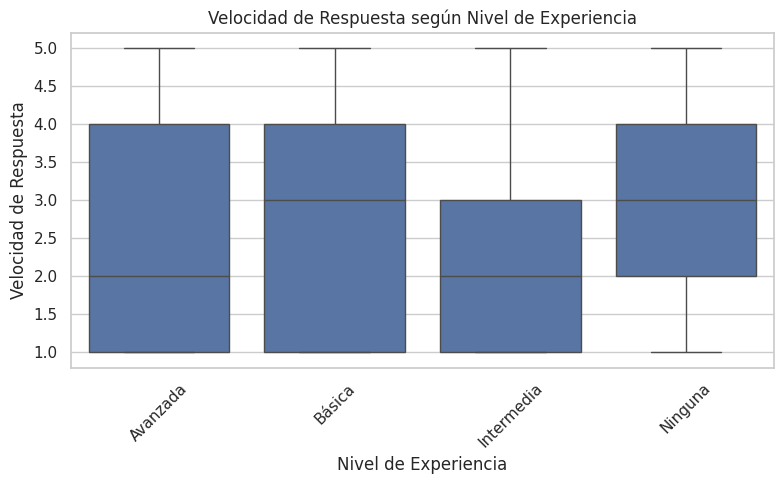

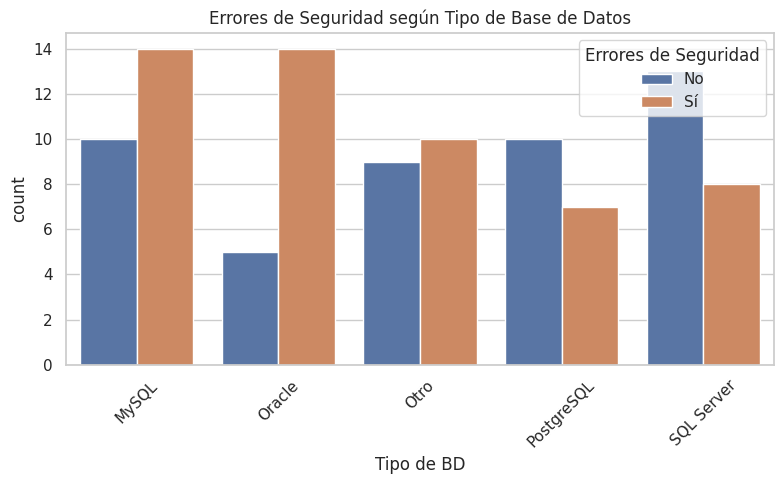

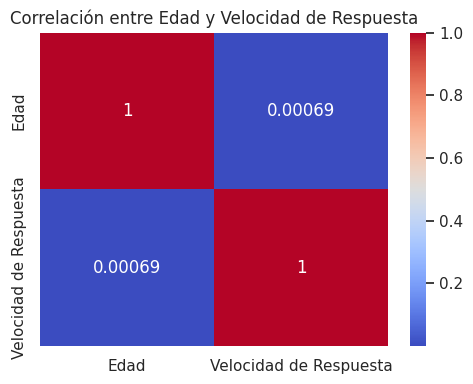


=== Tabla cruzada: Frecuencia de uso vs Nivel de experiencia ===
Nivel de Experiencia  Avanzada  Básica  Intermedia  Ninguna
Frecuencia de Uso                                          
Diariamente                  6       7           6        9
Frecuentemente              10       5           6        6
Nunca                        4       4           3        7
Ocasionalmente               6      12           2        7

=== Prueba t entre grupos experiencia avanzada y básica ===
t-stat: -1.392426516294894 p-valor: 0.16971928663509772

=== Chi-cuadrado: Tipo de BD vs Frecuencia de Vulnerabilidades ===
Chi²: 14.23107360966715 p-valor: 0.5815039556964032
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3578
Date:                

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
import numpy as np


sns.set(style="whitegrid")

archivo = "_chat.xlsx"
df = pd.read_excel(archivo, sheet_name='Sheet1')

columnas_categoricas = [
    'Ocupación', 'Nivel de Experiencia', 'Frecuencia de Uso',
    'Tipo de BD', 'Errores de Seguridad', 'Frecuencia de Vulnerabilidades',
    'Factores que Afectan la Eficiencia', 'Mejoras Sugeridas'
]
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

# --- Estadística Descriptiva ---
print("=== Estadísticas numéricas ===")
print(df[['Edad', 'Velocidad de Respuesta']].describe())

print("\n=== Distribución por categoría ===")
for col in columnas_categoricas[:5]:
    print(f"\n{col}:")
    print(df[col].value_counts())

# --- Visualizaciones ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Nivel de Experiencia', y='Velocidad de Respuesta')
plt.title('Velocidad de Respuesta según Nivel de Experiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tipo de BD', hue='Errores de Seguridad')
plt.title('Errores de Seguridad según Tipo de Base de Datos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(df[['Edad', 'Velocidad de Respuesta']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Edad y Velocidad de Respuesta')
plt.tight_layout()
plt.show()

# --- Tabla cruzada ---
print("\n=== Tabla cruzada: Frecuencia de uso vs Nivel de experiencia ===")
tabla_cruzada = pd.crosstab(df['Frecuencia de Uso'], df['Nivel de Experiencia'])
print(tabla_cruzada)

# --- Prueba t: experiencia avanzada vs básica ---
grupo1 = df[df['Nivel de Experiencia'] == 'Avanzada']['Velocidad de Respuesta']
grupo2 = df[df['Nivel de Experiencia'] == 'Básica']['Velocidad de Respuesta']
t_stat, p_val = ttest_ind(grupo1, grupo2, nan_policy='omit')
print("\n=== Prueba t entre grupos experiencia avanzada y básica ===")
print("t-stat:", t_stat, "p-valor:", p_val)

# --- Prueba Chi-cuadrado ---
print("\n=== Chi-cuadrado: Tipo de BD vs Frecuencia de Vulnerabilidades ===")
tabla = pd.crosstab(df['Tipo de BD'], df['Frecuencia de Vulnerabilidades'])
chi2, p, dof, expected = chi2_contingency(tabla)
print("Chi²:", chi2, "p-valor:", p)

# --- Regresión lineal: edad y frecuencia de uso como predictores de velocidad ---
import numpy as np

df['Velocidad de Respuesta'] = pd.to_numeric(df['Velocidad de Respuesta'], errors='coerce')
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

# Convertir variables categóricas a dummies
df_dummies = pd.get_dummies(df[['Frecuencia de Uso']], drop_first=True)

# Combinar variables numéricas y dummies
X = pd.concat([df['Edad'], df_dummies], axis=1)

# Eliminar filas con valores faltantes
X = X.dropna()
y = df.loc[X.index, 'Velocidad de Respuesta']  # Alineamos el target con X limpio

# Agregar constante
X = sm.add_constant(X)

# Convertir a numpy para evitar errores de dtype
X = np.asarray(X, dtype=float)
y = np.asarray(y, dtype=float)

# Crear y ajustar modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

